In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import pearsonr


In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [16]:
df = pd.read_csv('./data/가격점수DF.csv')
df.tail()

,구,10000원 미만,20000원 미만,30000원 미만,40000원 미만,40000원 이상,맛집수,가격 점수
20,용산구,46,76,33,14,22,191,2.424084
21,은평구,94,67,17,2,2,182,1.631868
22,종로구,72,85,20,5,17,199,2.045226
23,중구,51,78,28,7,26,190,2.363158
24,중랑구,92,70,12,4,2,180,1.633333


In [21]:
test2 = df[['구','가격 점수']]
test2.head()

,구,가격 점수
0,강남구,3.065000
1,강동구,1.710383
2,강북구,1.600000
3,강서구,1.871134
4,관악구,1.659686


In [20]:
income_tax = pd.read_csv('./data/구별 소득세.csv')
income_tax.drop('Unnamed: 0', axis=1,inplace=True)
income_tax.head()

,구,소득세
0,도봉구,227929
1,노원구,404969
2,강북구,146936
3,은평구,413900
4,종로구,3169471


In [28]:
df = pd.merge(income_tax,test2, on='구')
df

,구,소득세,가격 점수
0,도봉구,227929,1.500000
1,노원구,404969,1.671958
2,강북구,146936,1.600000
3,은평구,413900,1.631868
4,종로구,3169471,2.045226
5,성북구,863338,1.418848
6,동대문구,523330,1.484375
7,중랑구,259445,1.633333
8,서대문구,715787,1.601064
9,마포구,1427778,1.979167


In [31]:
df.to_csv('./data/소득세와가격점수.csv')

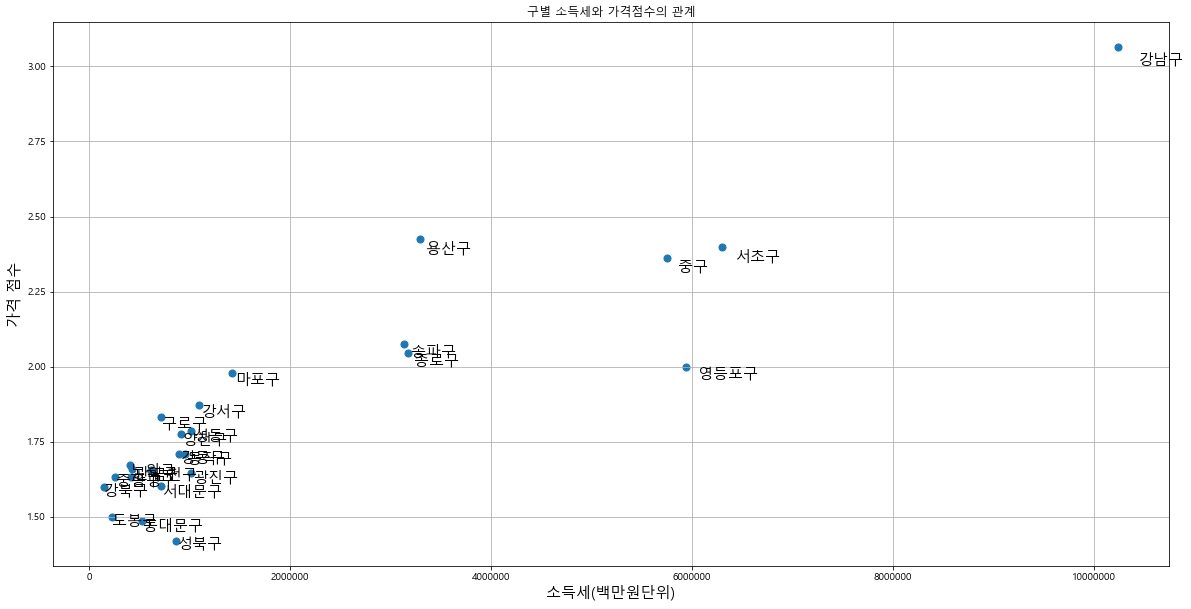

In [37]:
fp1 = np.polyfit(df['소득세'], df['가격 점수'],1)
fp1

f1 = np.poly1d(fp1)



plt.figure(figsize=(20,10))
plt.scatter(df['소득세'], df['가격 점수'], s=50)


for n in range(25):
    plt.text(df['소득세'][n]*1.02, df['가격 점수'][n]*0.98, 
             df.loc[n, '구'], fontsize=15)   
plt.title("구별 소득세와 가격점수의 관계")   
plt.xlabel('소득세(백만원단위)',fontsize=15)
plt.ylabel('가격 점수',fontsize=15)
plt.xscale('linear')
plt.ticklabel_format(axis='x',useOffset=False, style='plain')

plt.grid()
plt.show()

In [32]:
print(pearsonr(df['소득세'], df['가격 점수']))

(0.9144750319019931, 1.6386374859486384e-10)
